# Income prediction

The dataset for this project originates from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Adult). The idea of this notebook is based on Udacity Machine Learning Nanodegree project 'Finding donors'.

In [20]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time
# display for notebooks
%matplotlib inline
print('import complete')

import complete


In [21]:
# Load the Census dataset
data = pd.read_csv("census.csv")

# Display the first record
data.head(n=5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Part 1: Data Exploration and Processing

### Featureset Exploration

A quick investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.


In [22]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = (data.income == '>50K').sum()

# TODO: Number of records where individual's income is at most (less or equal than) $50,000 
n_at_most_50k = (data.income == '<=50K').sum()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100 * n_greater_50k / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


Based on the information from dataset source, we have displayed the features and their types / values below. Have a look at how some of those are distributed in the data by using DataFrame slicing or plotting the data with matplotlib. Think about how those features can affect individual income levels, and which might be most useful for its prediction.

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [23]:
# TODO: slice the dataframe and explore some of those variables. Hint: e.g. .value_counts() method
data['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

(array([7308., 8226., 8704., 8811., 5716., 3609., 2000.,  579.,  192.,
          77.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

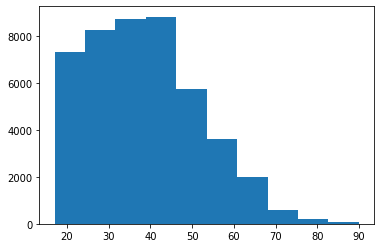

In [24]:
# TODO: plot a histogram of a feature by using plt.hist(data['feature_name'])
plt.hist(data['age'])

Run the code below to assess distributions of continuous variables in the data. Note the distribution of '`capital-gain'` and `'capital-loss'` features. 

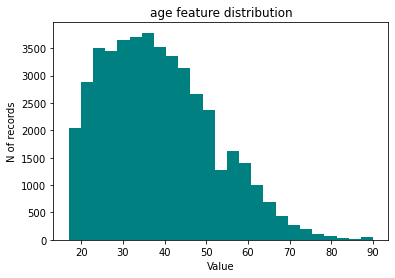

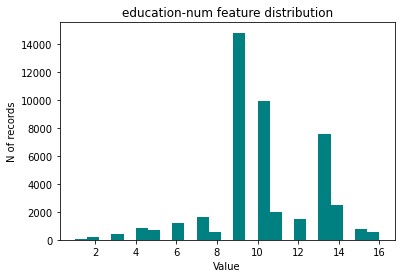

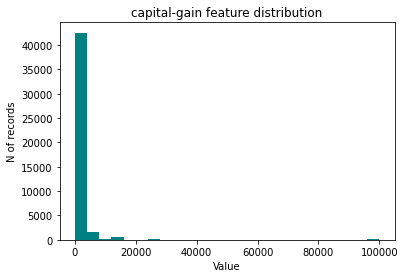

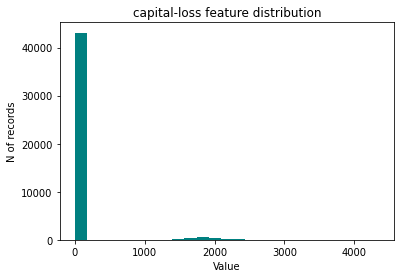

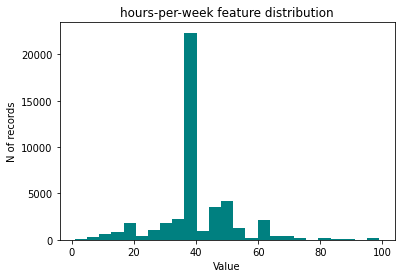

In [25]:
# TODO: pass names of numeric (continuous) variables to the list 'numeric_vars' to plot their distributions
numeric_vars = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

def plot_hist(feature_set, data):
    for feature in feature_set:
        plt.hist(data[feature], bins=25, color = 'teal')
        plt.title('{} feature distribution'.format(feature))
        plt.xlabel('Value')
        plt.ylabel('N of records')
        plt.show()

plot_hist(feature_set=numeric_vars, data=data)

### Data Processing
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

**Transforming Skewed Continuous Features**

A dataset may sometimes contain at least one feature whose values are heavily skewed towards a single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalised. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. In the previous section you had a chance to explore the data and observe this on the histogram.

One option to deal with those cases is to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

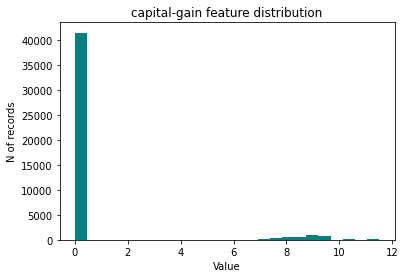

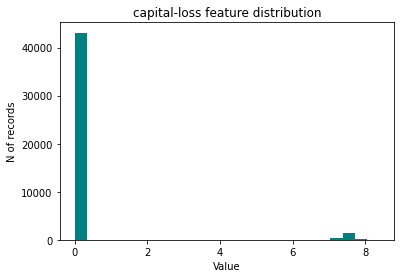

In [26]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# TODO: plot distribution of the skewed variables using plot_hist function defined above
plot_hist(feature_set=skewed, data=features_log_transformed)

**Normalizing Numerical Features**

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

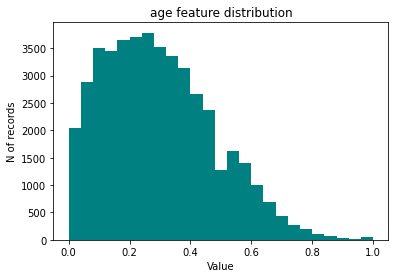

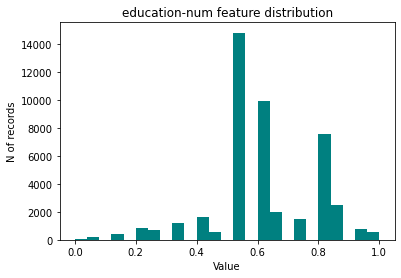

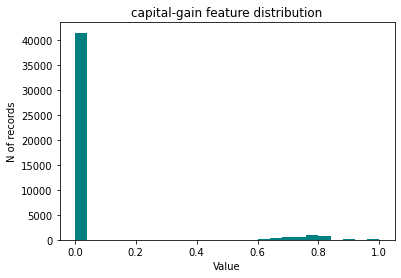

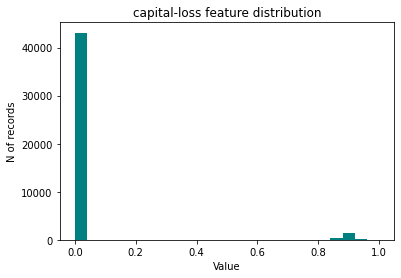

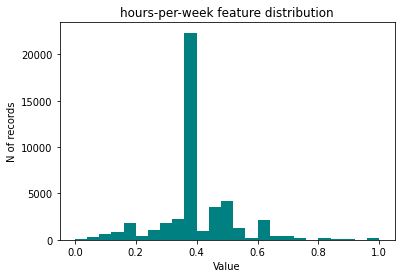

In [27]:
# TODO: Import sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# TODO: Initialize a scaler, then apply it to the numeric_vars features using fit_transform method
scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numeric_vars] = scaler.fit_transform(features_log_minmax_transform[numeric_vars])

# TODO: plot histograms of the transformed features to observe the changes in their distributions
plot_hist(feature_set=numeric_vars, data=features_log_minmax_transform)

**Processing of categorical variables**

We can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [28]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0, '>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names and top rows of the transformed data
print(encoded)
features_final.head()

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


----
##  Part 2 - Modelling Pipeline

In this section of the exercise you will explore different supervised models and apply them to the dataset. In order to correctly assess quality of your models and iterate over different experiments in a standardised manner, it is a normal practice to prepare a pipeline, which automates retrieval of some of the important metrics.

**Train-test split**

As a first step, you will split the dataset into train and test data, which will allow to test performance of the algorithm.

In [29]:
# TODO: Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# TODO: split the 'features_final' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


**Metrics and the Naive Predictor**

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible score(we take the harmonic mean as we are dealing with ratios).

Formula for [F1 score](https://en.wikipedia.org/wiki/F1_score):

`[2 * (Precision * Recall)/(Precision + Recall)]`


If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [30]:
# naive case is defined as treating every observation as positive:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
# encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall using formulas above
accuracy = (TP+TN)/(income.shape[0])
recall = TP/(TP+FN)
precision = TP/(TP+FP)
print('Recall is %.1f, precision is %.4f' % (recall, precision))
# TODO: Calculate F1-score using the formula above and correct values for precision and recall.
fscore = 2 * (precision * recall) / (precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F1-score: {:.4f}]".format(accuracy, fscore))

Recall is 1.0, precision is 0.2478
Naive Predictor: [Accuracy score: 0.2478, F1-score: 0.3972]


**Creating a Simple Training and Predicting Pipeline**

To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.

**Task**:
 - Import `f1_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F1-score for both the training subset and testing set.

In [31]:
# TODO: Import two metrics from sklearn - f1_score and accuracy_score
from sklearn.metrics import accuracy_score, f1_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on (from sklearn)
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    # setting up dictionary of results
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    # hint: use .fit(training_features[:],training_labels[:])
    # Get start training time
    start = time()
    # Fit the learner here
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    # Get end training time
    end = time()
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    # Get start time
    start = time()
    # Populate predictions
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    # Get end prediction time
    end = time()
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy score on the first 300 training samples (y_train[:300])
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy score on test set 
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F1-score on the the first 300 training samples
    results['f_train'] = f1_score(y_train[:300], predictions_train)
        
    # TODO: Compute F1-score on the test set
    results['f_test'] = f1_score(y_test, predictions_test)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

Below you should fill the missing pieces in the loop, which will apply your pipeline to 3 different classifiers.

In [32]:
# TODO: Import chosen models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# TODO: Initialize the three models
clf_A = LogisticRegression()
clf_B = RandomForestClassifier()
clf_C = SVC()

# TODO: Calculate sample sizes
samples_100 = X_train.shape[0]
samples_10 = int(np.ceil(X_train.shape[0] * 0.1))
samples_1 =  int(np.ceil(X_train.shape[0] * 0.01))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

LogisticRegression trained on 362 samples.
LogisticRegression trained on 3618 samples.


/Users/rajanrai/anaconda/envs/scipy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.
SVC trained on 362 samples.
SVC trained on 3618 samples.
SVC trained on 36177 samples.


**Investigation of results**

Plotting different metrics across classifiers can be very helpful during model selection. Here you will explore performance of your models by assessing different metrics

**Task**:
1. Run the code below to assess accuracy of your models on the test set
2. Explore other metrics, such as test F1-score, training score and training and prediction times. Make a note on how different models might perform in different environments (e.g. which model would be better to use if training time was a critical metric?) How the results differ from the naive predictor we defined earlier?

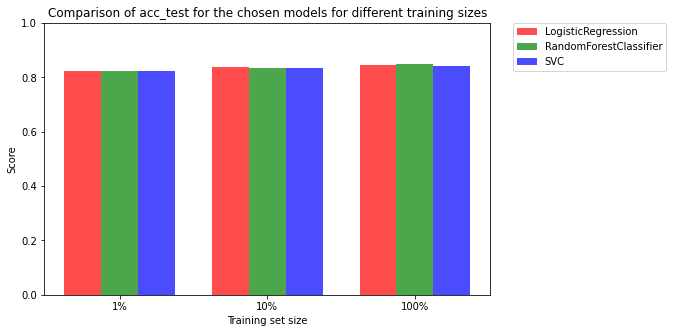

In [34]:
def plot_scores(results, metric='acc_test'):
    bar_width = 0.25
    x_axis_values = np.arange(3)
    fig, ax = plt.subplots(figsize = (8,5))
    if 'time' not in metric:
        ax.set_ylim([0,1])
    for i, clf in enumerate(results.keys()):
        y_axis_vals = [results[clf][i][metric] for i in range(3)]
        clr = ['r', 'g', 'b'][i]
        plt.bar(x_axis_values + bar_width * i, y_axis_vals, bar_width, color=clr, alpha=0.7, label=clf)
    plt.title('Comparison of {} for the chosen models for different training sizes'.format(metric))
    plt.xlabel('Training set size')
    if 'time' not in metric:
        plt.ylabel('Score')
    else:
        plt.ylabel('Time')
    plt.xticks(x_axis_values + bar_width ,["1%", "10%", "100%"])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
# code to create a plot    
plot_scores(results, metric='acc_test')

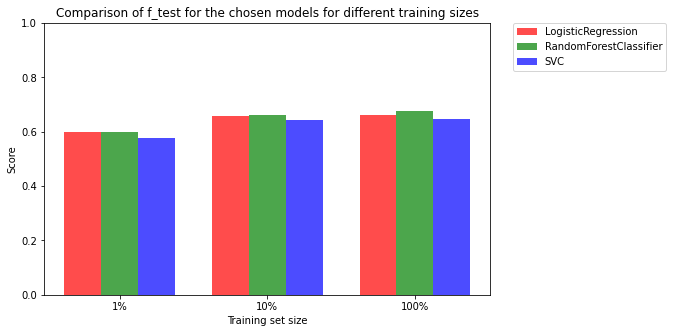

In [35]:
# TODO - explore different metrics using plot_scores function
plot_scores(results, metric='f_test')

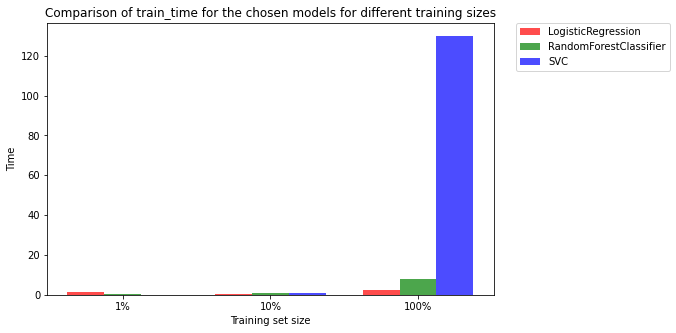

In [36]:
plot_scores(results, metric='train_time')

----
## Part 3 - Feature Importance and Feature Selection

Feature selection is a crucial step in any machine learning project, as it helps to identify best candidate models. In this section you will implement assessment of the feature importances and select optimal set of features. You will learn how to explain results of the model on the high level and operate on numpy arrays to extract data that you require more efficient.

**Task**:

1. Choose one of the algorithms from sklearn library which has a `feature_importance_` attribute (e.g. RandomForestClassifier).
2. Train the supervised model on the entire training set.
3. Extract feature importances.
4. Print a list of most important features.

Note most important features from the chosen model. Which features you thought were most important in the beginning of the exercise? Why? How does it compare with the observed feature importance?

In [48]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = clf.feature_importances_ 

# TODO: use numpy array sorting, argsort and indexing to return 10 most important features and their importances
feature_names = X_train.columns
top10_importances = np.sort(importances)[::-1][:10]
top10_features_indices = np.argsort(importances)[::-1][:10]
top10_features = X_train.columns[top10_features_indices]
for feature_importance_pair in zip(top10_features, top10_importances):
    print(feature_importance_pair)
# Optional challenge: plot feature importances. Hint: search in sklearn / matplotlib documentation for guidance.

('age', 0.23144476627446797)
('hours-per-week', 0.1145270417406276)
('capital-gain', 0.11136835953398552)
('education-num', 0.06609331411889685)
('marital-status_ Married-civ-spouse', 0.057790136753557264)
('relationship_ Husband', 0.05521784121387053)
('capital-loss', 0.03487205400984727)
('marital-status_ Never-married', 0.03243185390286983)
('occupation_ Exec-managerial', 0.021279246562385185)
('occupation_ Prof-specialty', 0.01531540047335617)


**Limiting features**

**Task**:
- Use the pipeline defined in the previous section and a list of top features to assess the model on the limited number of variables. How does it compare with the results on full dataset?

RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.


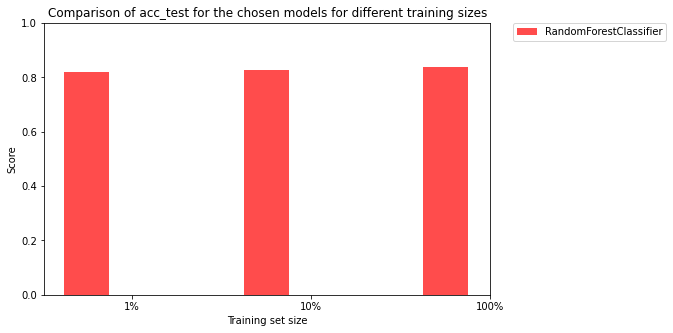

In [49]:
# TODO: apply the pipeline on the reduced features and save them to results_reduced
results_reduced = {}
clf = RandomForestClassifier()
clf_name = clf.__class__.__name__
results_reduced[clf_name] = {}
for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results_reduced[clf_name][i] = train_predict(clf, samples, X_train[top10_features], y_train, X_test[top10_features], y_test)


# TODO: use plot_scores function to assess the results
plot_scores(results_reduced, metric='acc_test')

**Feature selection**

The classes in the sklearn.feature_selection module can be used for programmatic feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets. One example of such class is [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel), which can help to utilise importances we extracted from the classifier earlier.

**Task**:

1. Import sklearn.feature_selection.SelectFromModel
2. Use the transformer to change X_train and X_test
3. Using pipeline defined in the previous section note difference in results. Are results better?


RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.


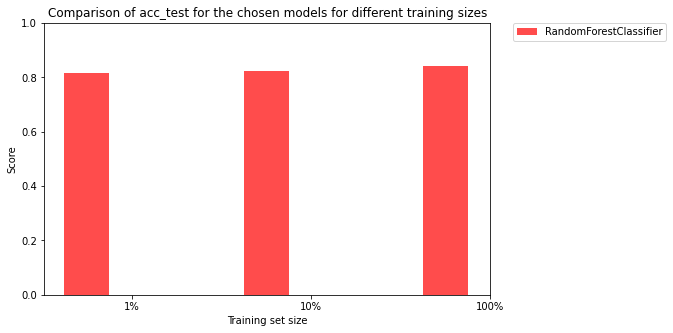

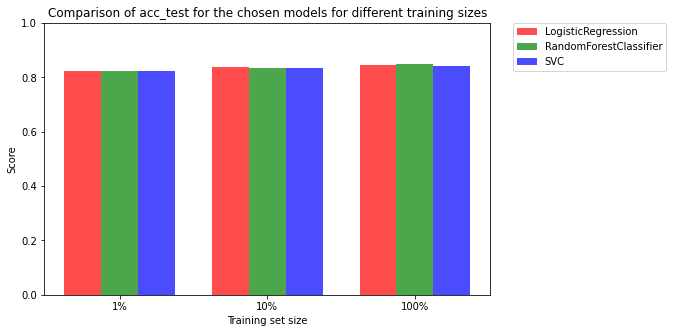

In [50]:
# TODO: Import SelectFromModel
from sklearn.feature_selection import SelectFromModel
# TODO: Apply the transformer on the pre-trained model (clf)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
# TODO: transform X_train and X_test
X_train_selection = model.transform(X_train)
X_test_selection = model.transform(X_test)

# TODO: apply the pipeline on the reduced features and save them to results_feature_selection
results_feature_selection = {}
clf_name = clf.__class__.__name__
results_feature_selection[clf_name] = {}
for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results_feature_selection[clf_name][i] = train_predict(clf, samples, X_train_selection, y_train, X_test_selection, y_test)


# TODO: use plot_scores function to assess the results
plot_scores(results_feature_selection, metric='acc_test')
plot_scores(results, metric='acc_test')

In [51]:
results['RandomForestClassifier'][2]

{'train_time': 8.023149013519287,
 'pred_time': 0.4489858150482178,
 'acc_train': 0.98,
 'acc_test': 0.8473189607517966,
 'f_train': 0.9523809523809524,
 'f_test': 0.6774118196683018}

In [52]:
results_feature_selection['RandomForestClassifier'][2]

{'train_time': 3.4378180503845215,
 'pred_time': 0.28446412086486816,
 'acc_train': 0.9533333333333334,
 'acc_test': 0.8402432283029297,
 'f_train': 0.8870967741935484,
 'f_test': 0.6584731741904987}

----
## Part 4 (challenge) - Model Tuning and Cross-Validation

Model Tuning is an important part of the pipeline as it helps to select best hyperparameters for machine learning models. Sklearn package has tools such as GridSearchCV which allows to perform exhaustive search on hyperparameters coupled with cross-validation to assess model performance on the wider range of datasets (remember previous sessions?).

This part of the exercise is an open challenge - use sklearn documentation to find out about GridSearchCV and try to implement it from scratch. Your code doesn't have to be dependent on the pipelines you defined above.

**Hint**: pick one of the classifiers and check sklearn documentation to identify hyperparameters which can be tuned.

In [54]:
# TODO: your code here
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params = {
    "n_estimators": [50, 100, 150],
"max_depth": [5, 10, 20]
}

clf = GridSearchCV(rf, params, cv=5)
clf.fit(X_train_selection, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 150]})

In [55]:
# access results of grid search this way
pd.DataFrame(clf.cv_results_)[['params','mean_test_score']]

,params,mean_test_score
0,"{'max_depth': 5, 'n_estimators': 50}",0.847970
1,"{'max_depth': 5, 'n_estimators': 100}",0.846090
2,"{'max_depth': 5, 'n_estimators': 150}",0.846532
3,"{'max_depth': 10, 'n_estimators': 50}",0.854687
4,"{'max_depth': 10, 'n_estimators': 100}",0.856014
5,"{'max_depth': 10, 'n_estimators': 150}",0.855295
6,"{'max_depth': 20, 'n_estimators': 50}",0.849103
7,"{'max_depth': 20, 'n_estimators': 100}",0.850319
8,"{'max_depth': 20, 'n_estimators': 150}",0.850015
